In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot  as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  cross_val_score

In [3]:
data=pd.read_csv("/home/manikanta/Documents/ML/classification/Ennsembling_learning/creditcard.csv")

In [4]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
x=data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [14]:
y=data['Class']

In [17]:
#pandas_profiling.ProfileReport(data)

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
clf.classes_

array([0, 1])

In [22]:
clf.n_features_

30

In [23]:
clf.score(x,y)


1.0

[Text(88.73553017921552, 213.69103448275862, 'X[17] <= -2.754\ngini = 0.003\nsamples = 284807\nvalue = [284315, 492]'),
 Text(65.93356176735799, 206.19310344827585, 'X[12] <= -2.181\ngini = 0.362\nsamples = 443\nvalue = [105, 338]'),
 Text(50.718124436429214, 198.6951724137931, 'X[14] <= -3.43\ngini = 0.296\nsamples = 410\nvalue = [74, 336]'),
 Text(28.015725879170425, 191.19724137931036, 'X[26] <= -0.264\ngini = 0.228\nsamples = 365\nvalue = [48, 317]'),
 Text(16.74503155996393, 183.69931034482758, 'X[27] <= 1.077\ngini = 0.459\nsamples = 98\nvalue = [35, 63]'),
 Text(10.30463480613165, 176.20137931034483, 'X[5] <= -0.013\ngini = 0.144\nsamples = 64\nvalue = [5, 59]'),
 Text(5.152317403065825, 168.70344827586206, 'X[19] <= 2.539\ngini = 0.034\nsamples = 57\nvalue = [1, 56]'),
 Text(2.5761587015329126, 161.2055172413793, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(7.728476104598737, 161.2055172413793, 'X[14] <= -8.242\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(5.152317

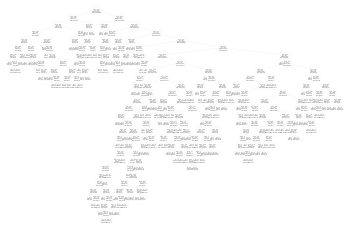

In [24]:
tree.plot_tree(clf)

In [25]:
#AdaBosting Techniques
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import DecisionTreeClassifier
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0))
clf.fit(x,y)
scores = cross_val_score(clf, x, y)
scores.mean()

0.7999999810763226

In [26]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x, y)
scores = cross_val_score(clf, x, y)
scores.mean()

0.799540017241418